In [1]:
import pandas as pd

df = pd.read_csv (r'Downloads\netflix_titles.csv')
print (df)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [2]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import statistics

In [3]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
#collecting info about null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [6]:
#Replacing the content of "rating" column to it's corresponding fullforms

df['rating'].replace({
    'PG-13':'Above 13 years', 
    'TV-MA':'Adult',
    'PG': 'Parental Guidance:Kids',
    'TV-14':'Above 13 years',
    'TV-PG':'Parental Guidance:Kids',
    'TV-Y': 'Kids',
    'TV-Y7': 'Kids above 7 years',
    'R': 'Adult',
    'TV-G':'Kids',
    'G':'Kids',
    'NC-17':'Adult',
    '74 min':'Adult',
    '84 min':'Adult',
    '66 min':'Adult',
    'UR':'Unrated',
    'NR':'Unrated',
    'TV-Y7-FV':'Kids above 7 years'
},inplace=True)

In [7]:
df.rating.unique()

array(['Above 13 years', 'Adult', 'Parental Guidance:Kids', 'Kids',
       'Kids above 7 years', 'Unrated', nan], dtype=object)

In [8]:
# Null values of "country" column replaced by the most common country
df.country=df['country'].fillna(df.country.mode())

# Null values of "duration", "director" , "cast" , "date_added" replaced by "Unavailable"
df['date_added']=df['date_added'].fillna('Unavailable')
df['cast']=df['cast'].fillna('Unavailable')
df['director']=df['director'].fillna('Unavailable')
df['duration']=df['duration'].fillna('Unavailable')

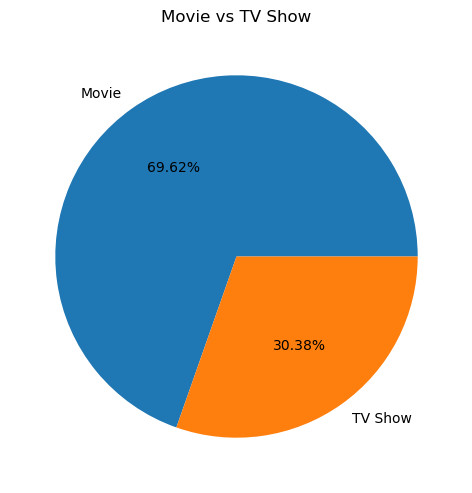

In [9]:
plt.figure(figsize=(10,6), dpi=100)
plt.pie(df.type.value_counts(),labels=df.type.value_counts().index, autopct='%1.2f%%')
plt.title('Movie vs TV Show')
plt.show()

In [10]:
df['rating'].unique()

array(['Above 13 years', 'Adult', 'Parental Guidance:Kids', 'Kids',
       'Kids above 7 years', 'Unrated', nan], dtype=object)

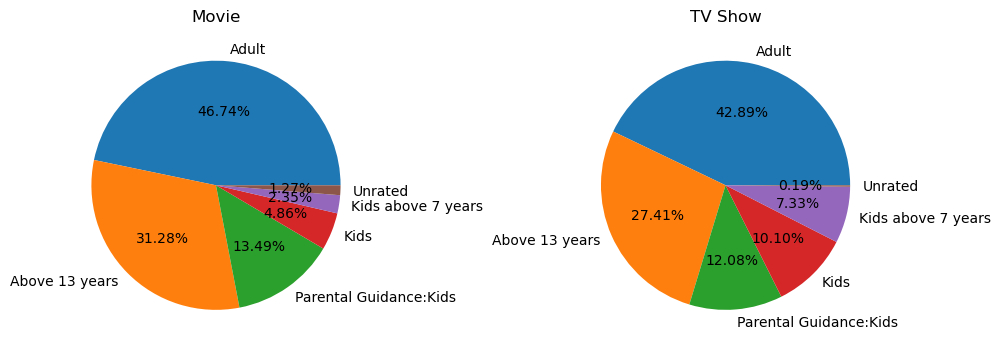

In [11]:
count=pd.DataFrame(df['rating'].value_counts())
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,6),dpi=100)
axes[0].pie(df['rating'][df.type=='Movie'].value_counts(),labels=count.index,autopct='%1.2f%%' )
axes[0].set_title('Movie')
axes[1].pie(df['rating'][df.type=='TV Show'].value_counts(),labels=count.index,autopct='%1.2f%%' )
axes[1].set_title('TV Show')
plt.tight_layout()
plt.show()

In [12]:
n=df[list(map(lambda x:"Crime" in x, df.listed_in))]
n.country.value_counts()

United States                             111
United Kingdom                             38
South Korea                                24
Mexico                                     22
Spain                                      20
                                         ... 
Austria, Germany                            1
Netherlands                                 1
Spain, Germany, Denmark, United States      1
Mexico, United States, Spain, Colombia      1
Ukraine                                     1
Name: country, Length: 79, dtype: int64

In [13]:
df.duration.value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
189 min         1
10 min          1
3 min           1
229 min         1
191 min         1
Name: duration, Length: 221, dtype: int64

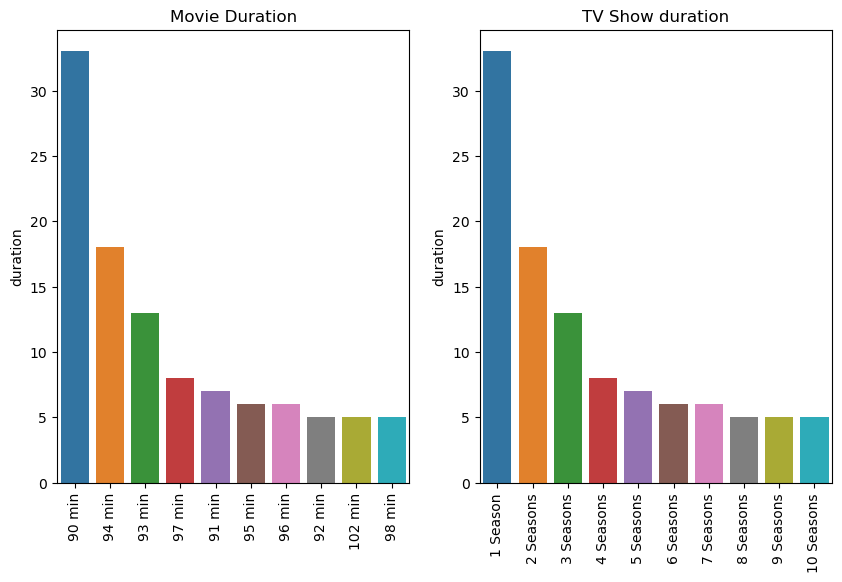

In [14]:
plt.figure(figsize=(10,6), dpi=100)
plt.subplot(1,2,1)
sns.barplot(x=df.duration[df.type=='Movie'].value_counts().index[0:10], y=df.duration.value_counts().value_counts().head(10))
plt.title("Movie Duration")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x=df.duration[df.type=='TV Show'].value_counts().index[0:10], y=df.duration.value_counts().value_counts().head(10))
plt.title("TV Show duration")
plt.xticks(rotation=90)
plt.show()

In [15]:
# I have filterd out the year from the "date_added" column and stored the value in a new column named "year_added"
date=df.date_added
year=[]
for d in date:
    year.append(d.split(",")) # splitting the value w.r.t. "," and appending the value in the list named year
year=pd.DataFrame(year)
df['year_added']=year[1]
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,"September 25, 2021",2020,Above 13 years,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Adult,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,Adult,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,Unavailable,Unavailable,NaN,"September 24, 2021",2021,Adult,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,Unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,Adult,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


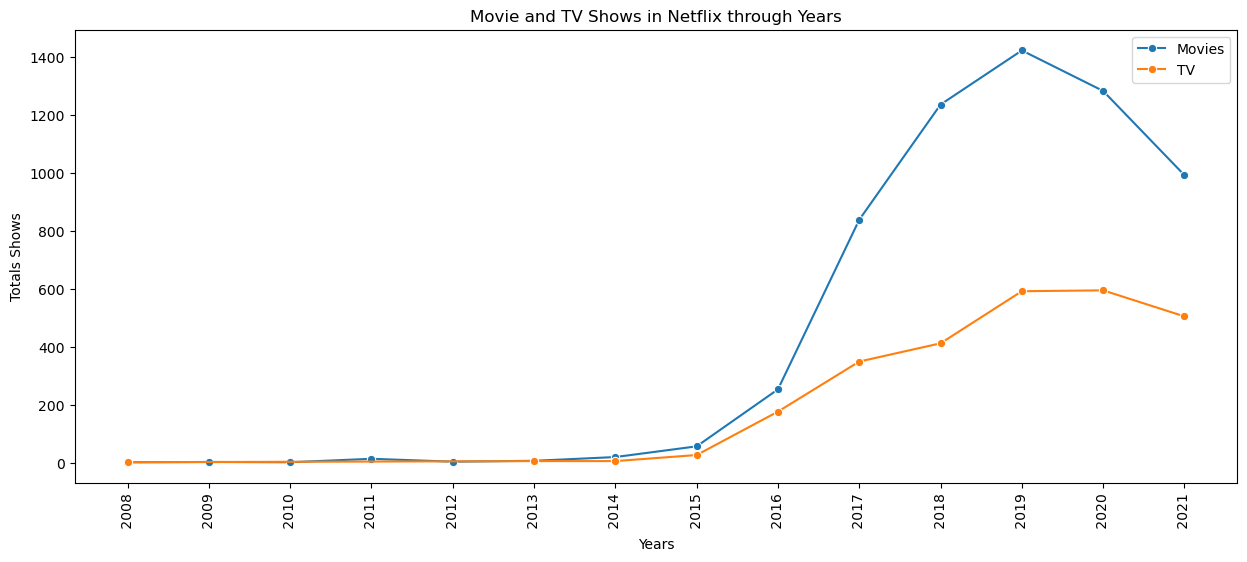

In [16]:
df_movies=df[df.type=='Movie']
df_tv=df[df.type=='TV Show']
right_movies=pd.DataFrame(df_movies.groupby('year_added').show_id.count())
right_tv=pd.DataFrame(df_tv.groupby('year_added').show_id.count())

plt.figure(figsize=(15,6), dpi=100)
sns.lineplot(x=right_movies.index,y=right_movies.show_id, label='Movies', marker='o')
sns.lineplot(x=right_tv.index,y=right_tv.show_id, label='TV',marker='o' )
plt.title('Movie and TV Shows in Netflix through Years')
plt.xlabel('Years')
plt.ylabel('Totals Shows')
plt.xticks(rotation=90)
plt.show()

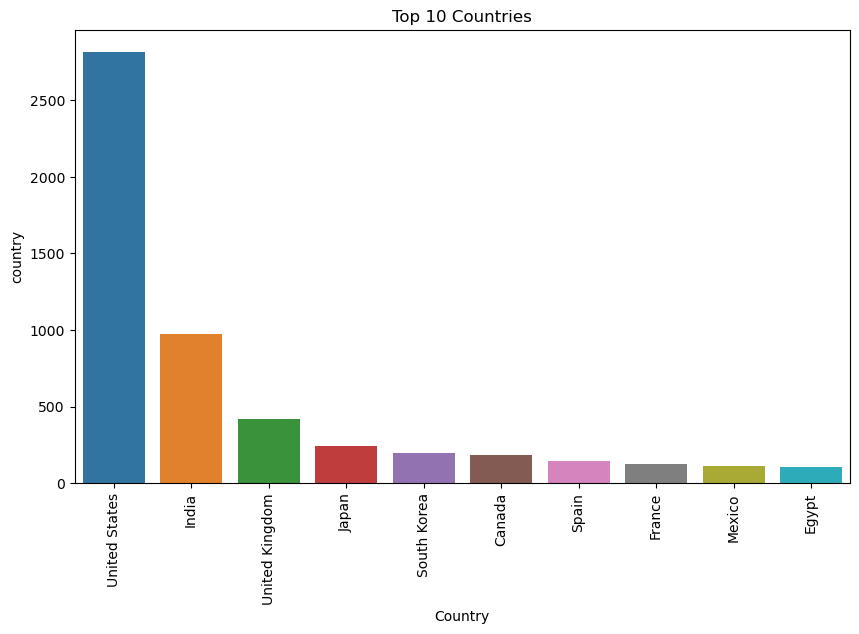

In [17]:
plt.figure(figsize=(10,6), dpi=100)
df['country'].value_counts().head(10)
sns.barplot(x=df['country'].value_counts().index[0:10],y=df['country'].value_counts().head(10))
plt.xticks(rotation=90)
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.show()

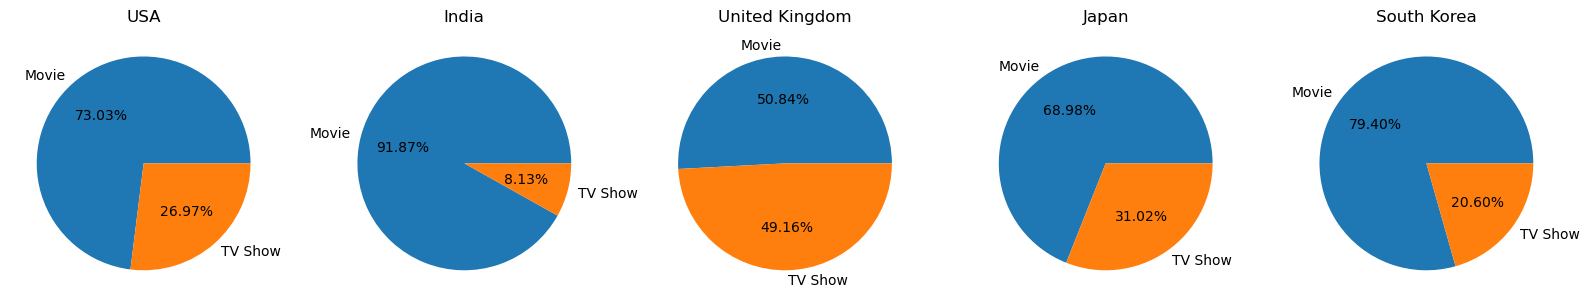

In [18]:
# USA
plt.figure(figsize=(20,20), dpi=100)
plt.subplot(1,5,1)
plt.pie(df[df.country=='United States'].type.value_counts(),labels=df[df.country=='United States'].type.value_counts().index, autopct='%1.2f%%')
plt.title('USA')
#India
plt.subplot(1,5,2)
plt.pie(df[df.country=='India'].type.value_counts(),labels=df[df.country=='India'].type.value_counts().index, autopct='%1.2f%%')
plt.title('India')
#United Kingdom
plt.subplot(1,5,3)
plt.pie(df[df.country=='United Kingdom'].type.value_counts(),labels=df[df.country=='India'].type.value_counts().index, autopct='%1.2f%%')
plt.title('United Kingdom')
#Japan
plt.subplot(1,5,4)
plt.pie(df[df.country=='Japan'].type.value_counts(),labels=df[df.country=='India'].type.value_counts().index, autopct='%1.2f%%')
plt.title('Japan')
#South Korea
plt.subplot(1,5,5)
plt.pie(df[df.country=='South Korea'].type.value_counts(),labels=df[df.country=='India'].type.value_counts().index, autopct='%1.2f%%')
plt.title('South Korea')
plt.show()